In [33]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

DIR = "/notebooks/Thesis/results/aug6_bestAccuracy/"

names = []
metricsNorm = []
metricsCrash = []
alltargs = []
allpreds = []
normtargs = []
normpreds = []
crashtargs = []
crashpreds = []
for root, dirs, files in os.walk(DIR):
    for file in files:
        if file.endswith(".csv"):
            path = os.path.join(root, file)
            df = pd.read_csv(path, names=['frame', 'xtl', 'ytl', 'target', 'prediction'])
            targs = df['target']
            preds = df['prediction']

            if len(targs) == 0:
                continue

            alltargs += targs.values.tolist()
            allpreds += preds.values.tolist()

            if "Normal" in file:
                normtargs += targs.values.tolist()
                normpreds += preds.values.tolist()
            else:
                crashtargs += targs.values.tolist()
                crashpreds += preds.values.tolist()               

            acc = accuracy_score(targs, preds)
            prec = precision_score(targs, preds, zero_division=0)
            recall = recall_score(targs, preds, zero_division=0)
            f1 = f1_score(targs, preds, zero_division=1)

            # names.append()
            if "Normal" in file:
                print(file)
                metricsNorm.append([file[:-4], acc, prec, recall, f1])
            else:
                metricsCrash.append([file[:-4], acc, prec, recall, f1])
            

metricsNormDF = pd.DataFrame(metricsNorm)
metricsCrashDF = pd.DataFrame(metricsCrash)
print(metricsNormDF)
print(metricsCrashDF)
metricsCrashDF.to_csv("patchmethodresultsCrash.csv")
metricsNormDF.to_csv("patchmethodresultsNorm.csv")

Normal_Videos_903_x264_1.csv
Normal_Videos_902_x264_5.csv
Normal_Videos_909_x264_0.csv
Normal_Videos_941_x264_6.csv
Normal_Videos_914_x264_3.csv
Normal_Videos_908_x264_14.csv
Normal_Videos_915_x264_2.csv
Normal_Videos_896_x264_10.csv
Normal_Videos_906_x264_12.csv
Normal_Videos_877_x264_11.csv
Normal_Videos_907_x264_9.csv
Normal_Videos_911_x264_4.csv
Normal_Videos_913_x264_13.csv
Normal_Videos_872_x264_8.csv
Normal_Videos_831_x264_7.csv
Normal_Videos_875_x264_16.csv
Normal_Videos_908_x264_14-checkpoint.csv
                                       0    1    2    3    4
0               Normal_Videos_903_x264_1  1.0  0.0  0.0  1.0
1               Normal_Videos_902_x264_5  1.0  0.0  0.0  1.0
2               Normal_Videos_909_x264_0  1.0  0.0  0.0  1.0
3               Normal_Videos_941_x264_6  1.0  0.0  0.0  1.0
4               Normal_Videos_914_x264_3  1.0  0.0  0.0  1.0
5              Normal_Videos_908_x264_14  1.0  0.0  0.0  1.0
6               Normal_Videos_915_x264_2  1.0  0.0  0.0  1.0
7

In [5]:
print("All Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(alltargs, allpreds), 
      precision_score(alltargs, allpreds), 
      recall_score(alltargs, allpreds), 
      f1_score(alltargs, allpreds))
print("Normal Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(normtargs, normpreds), 
      precision_score(normtargs, normpreds), 
      recall_score(normtargs, normpreds), 
      f1_score(normtargs, normpreds))
print("Crash Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(crashtargs, crashpreds),
      precision_score(crashtargs, crashpreds),
      recall_score(crashtargs, crashpreds), 
      f1_score(crashtargs, crashpreds))

All Accuracy, Precision, Recall, and F1 Score
0.6790225387160214 0.16774079005770084 0.50924378806662 0.2523571676593926
Normal Accuracy, Precision, Recall, and F1 Score
1.0 0.0 0.0 0.0
Crash Accuracy, Precision, Recall, and F1 Score


/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

0.6521063653933394 0.16774079005770084 0.50924378806662 0.2523571676593926


In [6]:
print(len(crashtargs), len(crashpreds))

160917 160917


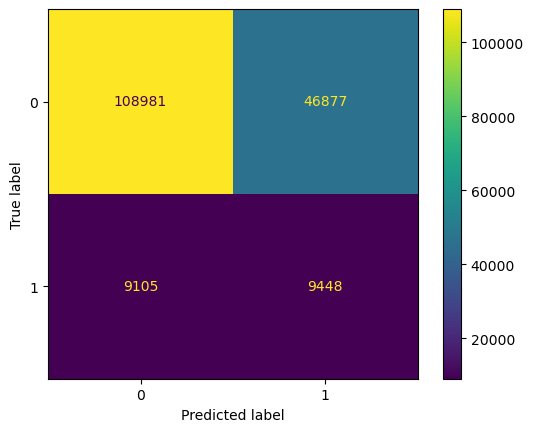

In [7]:
cm = confusion_matrix(alltargs, allpreds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

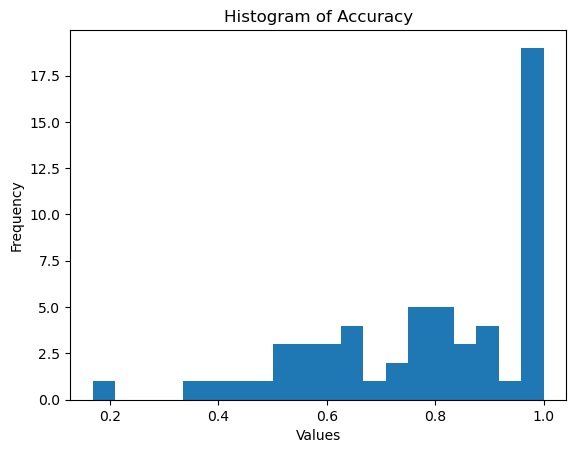

In [8]:
plt.hist(metricsDF[1].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy')
plt.show()

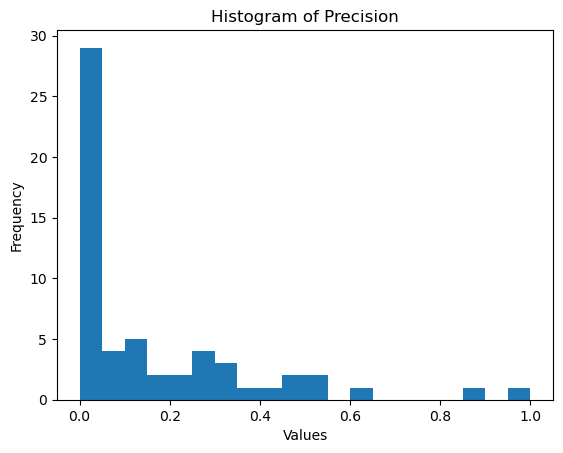

In [10]:
plt.hist(metricsDF[2].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Precision')
plt.show()

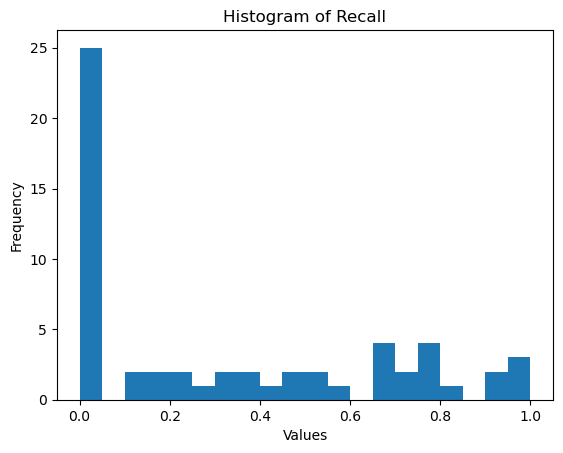

In [11]:
plt.hist(metricsDF[3].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Recall')
plt.show()

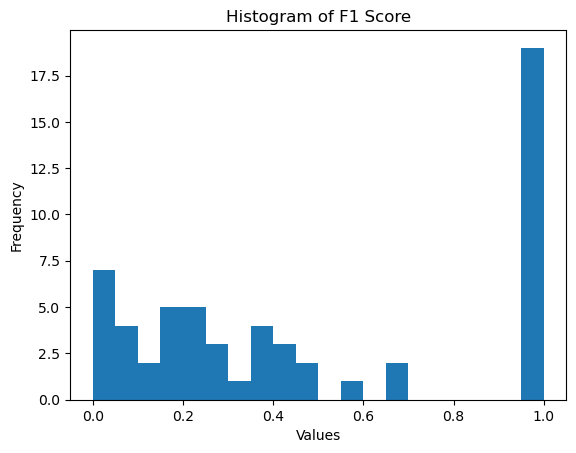

In [12]:
plt.hist(metricsDF[4].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of F1 Score')
plt.show()

In [36]:
yolores = pd.read_csv('../YoloScores.csv', names = ['name', 'YOLO_accuracy', 'YOLO_precision', 'YOLO_recall', 'YOLO_specificity'])
# yolores['name'] = yolores['name'].str.strip('.mp4')
yolores['name'] = yolores['name'].str[:13]
print(yolores)

metricsCrashDF.columns = ['name', 'accuracy', 'precision', 'recall', 'f1score']
metricsCrashDF['name'] = metricsCrashDF['name'].str[:13]

print(metricsCrashDF)

merged = pd.merge(yolores, metricsCrashDF, on='name', how='outer')
print(merged)
merged.to_csv('combinedRes.csv')

             name  YOLO_accuracy  YOLO_precision  YOLO_recall  \
0   k932VZGqE6c04       0.387821        0.000000     0.000000   
1   nsHYg3ENgk407       0.839844        0.683333     0.650794   
2   bXaAw1730zE01       0.621053        1.000000     0.294118   
3   7YEUfIVVk9Y05       0.805556        0.000000     0.000000   
4   nSK7cehJiCE08       0.260606        1.000000     0.054264   
5   Z52L6jGdSkY13       0.663366        0.575000     0.575000   
6   6mVcTFd5TzI28       0.267974        0.000000     0.000000   
7   ieFXAiS97A008       0.763830        0.000000     0.000000   
8   tDN-mwNSJc804       0.770370        0.590909     0.906977   
9   bSZkOI7eF8k21       0.980000        0.974286     1.000000   
10  xKT7khciy-c17       0.791411        0.226667     0.629630   
11  nkFprOkNnRE40       0.868687        0.831169     1.000000   
12  mOwuW8t6-GQ03       0.265909        0.000000     0.000000   
13  BSNh9UoKY5403       0.601351        0.769231     0.151515   
14  IuHk11-Yzn006       0

In [38]:
filtered = merged[(merged['YOLO_accuracy'].notna()) & (merged['accuracy'].notna())]
print(filtered)

             name  YOLO_accuracy  YOLO_precision  YOLO_recall  \
1   nsHYg3ENgk407       0.839844        0.683333     0.650794   
2   bXaAw1730zE01       0.621053        1.000000     0.294118   
3   7YEUfIVVk9Y05       0.805556        0.000000     0.000000   
4   nSK7cehJiCE08       0.260606        1.000000     0.054264   
5   Z52L6jGdSkY13       0.663366        0.575000     0.575000   
6   6mVcTFd5TzI28       0.267974        0.000000     0.000000   
7   ieFXAiS97A008       0.763830        0.000000     0.000000   
8   tDN-mwNSJc804       0.770370        0.590909     0.906977   
9   bSZkOI7eF8k21       0.980000        0.974286     1.000000   
10  xKT7khciy-c17       0.791411        0.226667     0.629630   
11  nkFprOkNnRE40       0.868687        0.831169     1.000000   
12  mOwuW8t6-GQ03       0.265909        0.000000     0.000000   
13  BSNh9UoKY5403       0.601351        0.769231     0.151515   
14  IuHk11-Yzn006       0.995338        0.991803     1.000000   
15  mg6PLF8sHWw03       0

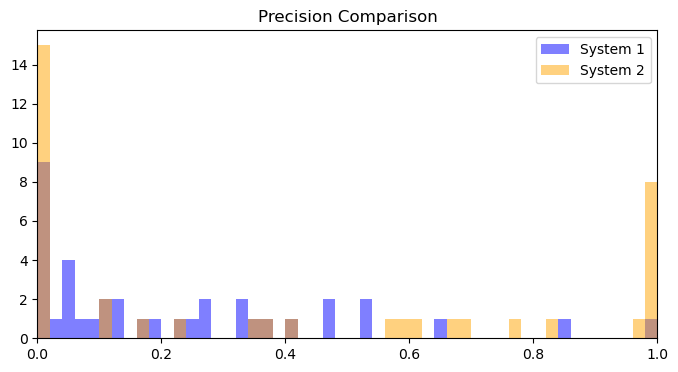

In [53]:
nbins = 50
one = filtered['YOLO_precision']
two = filtered['precision']
bins = np.histogram(np.hstack((one, two)), bins=nbins)[1]
plt.figure(figsize=(8, 4))
plt.hist(two, bins=bins, alpha=0.5, label=f"System 1", color='blue')
plt.hist(one, bins=bins, alpha=0.5, label=f"System 2", color='orange')
plt.legend()
plt.title('Precision Comparison')
plt.xlim(0, 1)
plt.show()

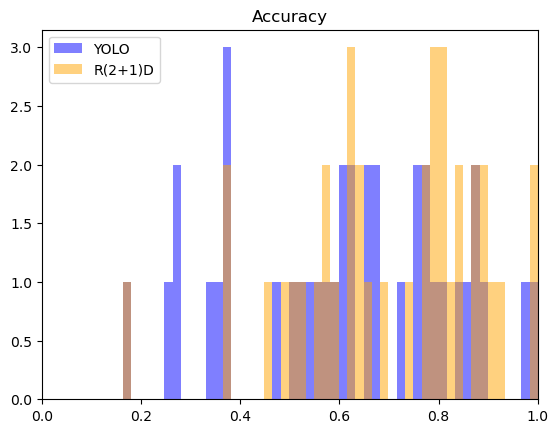

In [44]:
nbins = 50
one = filtered['YOLO_accuracy']
two = filtered['accuracy']
bins = np.histogram(np.hstack((one, two)), bins=nbins)[1]
plt.hist(one, bins=bins, alpha=0.5, label=f"YOLO", color='blue')
plt.hist(two, bins=bins, alpha=0.5, label=f"R(2+1)D", color='orange')
plt.legend()
plt.title('Accuracy')
plt.xlim(0, 1)
plt.show()

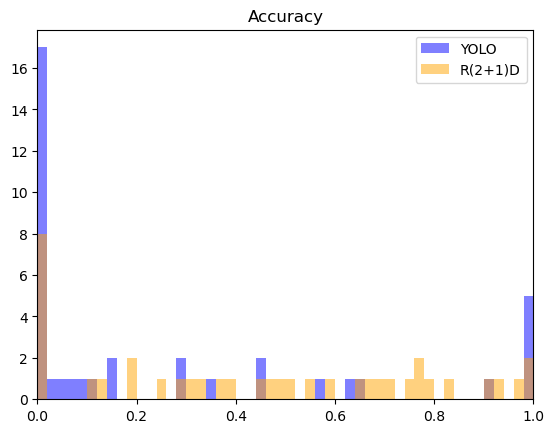

In [45]:
nbins = 50
one = filtered['YOLO_recall']
two = filtered['recall']
bins = np.histogram(np.hstack((one, two)), bins=nbins)[1]
plt.hist(one, bins=bins, alpha=0.5, label=f"YOLO", color='blue')
plt.hist(two, bins=bins, alpha=0.5, label=f"R(2+1)D", color='orange')
plt.legend()
plt.title('Accuracy')
plt.xlim(0, 1)
plt.show()